# Regression Analysis

The purpose of this notebook is to use linear regression to predict player salary.

### 1.0.1 Imports

In [1]:
# import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 1.1 Data

In [4]:
df = pd.read_csv('data/processed/players_final.csv')

df = df[df.salary.notnull()]
df = df[df['Last Name'].notnull()]
df = df[df['Dist.'].notnull()]
df = df[df.G > 10]

In [5]:
df.shape

(4515, 75)

# 2 First Models

In [6]:
means = df.groupby('Full Name').mean()

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     365.4
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:13:28   Log-Likelihood:                -75667.
No. Observations:                4515   AIC:                         1.514e+05
Df Residuals:                    4506   BIC:                         1.514e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.888e+07   6.92e+05    -27.296      0.0

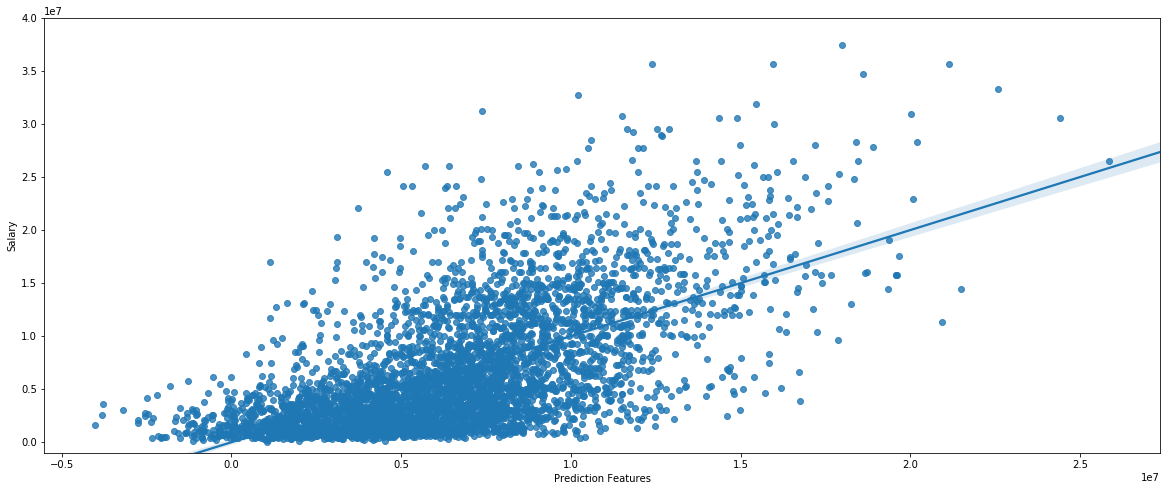

In [29]:
m_1 = ols('salary ~ PER + PTS + FG + BPM + VORP + FGA + WS + Age', df).fit()

print(m_1.summary())

plt.figure(figsize = (20,8))
sns.regplot(x = m_1.fittedvalues, y = 'salary', data = df, fit_reg = True)
plt.ylabel('Salary')
plt.xlabel('Prediction Features')
plt.ylim([-0.1e7, 4e7])

plt.show()

In [25]:
df.corr().sort_values('salary', ascending = False).loc[:,'salary'][:14]

salary    1.000000
PER       0.454870
PTS       0.442607
FG        0.421706
USG%      0.412066
BPM       0.388022
VORP      0.387593
FGA       0.383824
WS        0.366596
OBPM      0.358624
FT        0.346092
OWS       0.339157
WS/48     0.337014
Age       0.331977
Name: salary, dtype: float64